In [104]:
import pandas as pd
import numpy as np
train_csv = pd.read_csv("train.csv")
train_df = pd.DataFrame(train_csv)
train_df = train_df.sample(frac = 0.01, random_state=42)
train_df.head(100)

,Index,Sentiment,Text
781974,781974,0,i did not know that @PaulaAbdul had a step bro...
937737,937737,1,"@sheila97 bamburi beach , travellers , ocean s..."
907828,907828,1,@jesterjay SWINE FLU. Some family just came ba...
784628,784628,0,The Kids video seriously freaks me out
662460,662460,0,Back is hurting. x
...,...,...,...
230393,230393,0,is sleeping alone for the first time in a LONG...
444826,444826,0,Still have no idea what to do with all the cra...
275014,275014,0,"@Kiwein I suppose friend of mine, but still sh..."
100812,100812,0,@CosgroveMiranda well....I have to go to the d...


In [105]:
test_csv = pd.read_csv("test.csv")
test_df = pd.DataFrame(test_csv)
test_df.head(5)

,Index,Sentiment,Text
0,0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,1,Reading my kindle2... Love it... Lee childs i...
2,2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary You'll love your Kindle2. I've had...
4,4,1,@mikefish Fair enough. But i have the Kindle2...


In [106]:
#basic stats
train_length= len(train_df)
print("Size of train dataset: ", train_length)
train_df.isna().sum()
#the reuslts indicate that there are no null values in the dataframe

Size of train dataset:  10486


Index        0
Sentiment    0
Text         0
dtype: int64

In [107]:
test_length = len(test_df)
print("Size of test dataset: ", test_length)
test_df.isna().sum()

Size of test dataset:  359


Index        0
Sentiment    0
Text         0
dtype: int64

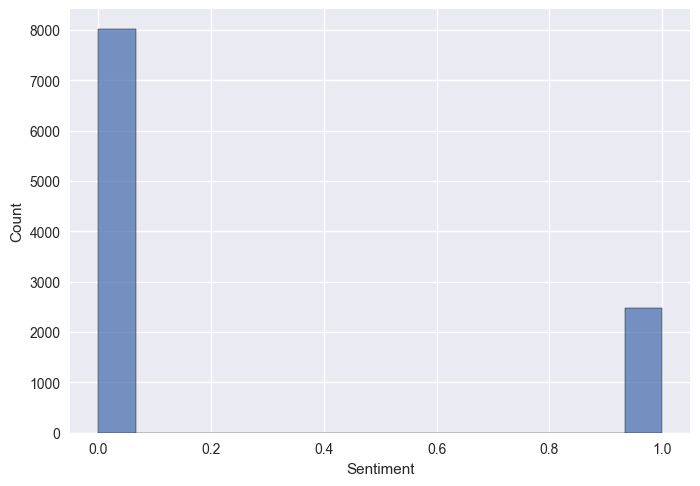

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
color = sns.color_palette

#sentiment distribution of train dataset
train_sen = sns.histplot(train_df['Sentiment'])
#the sentiments provided in the train dataset skew largely negative

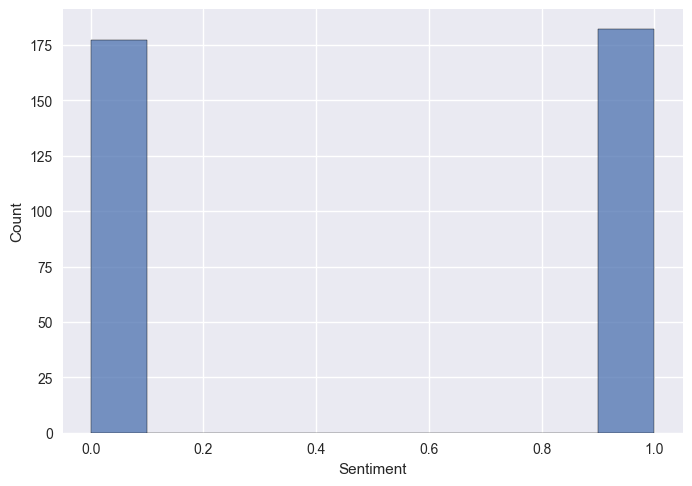

In [109]:
test_sen = sns.histplot(test_df['Sentiment'])

In [110]:
#Text Preprocessing
train_df['Text'] = train_df['Text'].apply(str.lower)
train_df.head(10)

,Index,Sentiment,Text
781974,781974,0,i did not know that @paulaabdul had a step bro...
937737,937737,1,"@sheila97 bamburi beach , travellers , ocean s..."
907828,907828,1,@jesterjay swine flu. some family just came ba...
784628,784628,0,the kids video seriously freaks me out
662460,662460,0,back is hurting. x
280139,280139,0,@heyraynie that wasn't a cheque to ae was it? ...
355572,355572,0,"nom, minstrels. really pissed off the weather'..."
749979,749979,0,@leetha i saw. they showed the trains on chan...
374753,374753,0,@willielongnthik rite! so now im eatin grapes ...
17327,17327,0,@worldvillage i wish i had seen them in sf. i ...


In [111]:
train_df['Remove_Punc'] = train_df['Text'].str.replace('[^\w\s]','')
train_df.head(10)

/var/folders/51/h4ghhg616dd3q7bsvdzhjr_h0000gn/T/ipykernel_5360/20703640.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,Index,Sentiment,Text,Remove_Punc
781974,781974,0,i did not know that @paulaabdul had a step bro...,i did not know that paulaabdul had a step brot...
937737,937737,1,"@sheila97 bamburi beach , travellers , ocean s...",sheila97 bamburi beach travellers ocean spor...
907828,907828,1,@jesterjay swine flu. some family just came ba...,jesterjay swine flu some family just came back...
784628,784628,0,the kids video seriously freaks me out,the kids video seriously freaks me out
662460,662460,0,back is hurting. x,back is hurting x
280139,280139,0,@heyraynie that wasn't a cheque to ae was it? ...,heyraynie that wasnt a cheque to ae was it i j...
355572,355572,0,"nom, minstrels. really pissed off the weather'...",nom minstrels really pissed off the weathers g...
749979,749979,0,@leetha i saw. they showed the trains on chan...,leetha i saw they showed the trains on channe...
374753,374753,0,@willielongnthik rite! so now im eatin grapes ...,willielongnthik rite so now im eatin grapes wi...
17327,17327,0,@worldvillage i wish i had seen them in sf. i ...,worldvillage i wish i had seen them in sf i ha...


In [112]:
# train_df['Remove_Punc'] = train_df['Remove_Punc'].str.replace('\d+', '')
# train_df.head(10)

In [113]:
test_df['Text'] = test_df['Text'].apply(str.lower)
test_df.head(10)

,Index,Sentiment,Text
0,0,1,@stellargirl i loooooooovvvvvveee my kindle2. ...
1,1,1,reading my kindle2... love it... lee childs i...
2,2,1,"ok, first assesment of the #kindle2 ...it fuck..."
3,3,1,@kenburbary you'll love your kindle2. i've had...
4,4,1,@mikefish fair enough. but i have the kindle2...
5,5,1,@richardebaker no. it is too big. i'm quite ha...
6,6,0,fuck this economy. i hate aig and their non lo...
7,7,1,jquery is my new best friend.
8,8,1,loves twitter
9,9,1,how can you not love obama? he makes jokes abo...


In [114]:
# test_df['Remove_Punc'] = test_df['Text'].str.replace('[^\w\s]','')
# test_df.head(10)

In [115]:
# test_df['Remove_Punc'] = test_df['Remove_Punc'].str.replace('\d+', '')
# test_df.head(10)

In [116]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import RegexpTokenizer
# nltk.download()
# nltk.download('stopwords')

stops = set(stopwords.words('english'))
print(stops)

# train_df.head(5)
tokenizer = RegexpTokenizer(r'\w+')
train_df['Tokenized'] = train_df['Text'].apply(tokenizer.tokenize)
train_df.head(10)
# train_df['Tokenized'] = train_df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)
   
# train_df.head(10)

{"aren't", 'above', "shan't", 'off', 'when', 'd', 'has', 'y', 'and', 'both', 'aren', "needn't", "isn't", 'wouldn', 'isn', 'few', 'haven', 'they', 'is', 'in', 'further', 'have', "couldn't", "haven't", 'ain', 'its', 'while', 'own', 'there', 'so', 'hers', "mustn't", 'once', 'by', "she's", 'm', 'with', 'not', 'doesn', 'what', 'why', 'o', "shouldn't", 'weren', 'or', 'doing', "weren't", 'me', 'was', 'down', 'can', 'but', 'wasn', "should've", 'being', 'been', 'during', 'now', 'herself', 're', 'how', 'ours', "you're", 'very', 'hasn', 't', 'hadn', 'mustn', 'shouldn', 'yours', 'who', 'here', 'this', 'no', 'were', 'ourselves', 'over', "wouldn't", 'such', "hasn't", 'each', 'whom', "won't", "that'll", 'their', 'won', 'your', 's', 'under', 'only', 'from', 'then', 'had', 'did', "doesn't", "hadn't", 'more', 'them', 'through', 'too', 'her', 'just', 'after', 'she', 'that', 'should', 'themselves', 'again', 'himself', 'itself', 'for', 'does', 'shan', 'all', 'up', "don't", 'needn', 'it', 'out', 'don', 'on'

,Index,Sentiment,Text,Remove_Punc,Tokenized
781974,781974,0,i did not know that @paulaabdul had a step bro...,i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ..."
937737,937737,1,"@sheila97 bamburi beach , travellers , ocean s...",sheila97 bamburi beach travellers ocean spor...,"[sheila97, bamburi, beach, travellers, ocean, ..."
907828,907828,1,@jesterjay swine flu. some family just came ba...,jesterjay swine flu some family just came back...,"[jesterjay, swine, flu, some, family, just, ca..."
784628,784628,0,the kids video seriously freaks me out,the kids video seriously freaks me out,"[the, kids, video, seriously, freaks, me, out]"
662460,662460,0,back is hurting. x,back is hurting x,"[back, is, hurting, x]"
280139,280139,0,@heyraynie that wasn't a cheque to ae was it? ...,heyraynie that wasnt a cheque to ae was it i j...,"[heyraynie, that, wasn, t, a, cheque, to, ae, ..."
355572,355572,0,"nom, minstrels. really pissed off the weather'...",nom minstrels really pissed off the weathers g...,"[nom, minstrels, really, pissed, off, the, wea..."
749979,749979,0,@leetha i saw. they showed the trains on chan...,leetha i saw they showed the trains on channe...,"[leetha, i, saw, they, showed, the, trains, on..."
374753,374753,0,@willielongnthik rite! so now im eatin grapes ...,willielongnthik rite so now im eatin grapes wi...,"[willielongnthik, rite, so, now, im, eatin, gr..."
17327,17327,0,@worldvillage i wish i had seen them in sf. i ...,worldvillage i wish i had seen them in sf i ha...,"[worldvillage, i, wish, i, had, seen, them, in..."


In [117]:
test_df['Tokenized'] = test_df['Text'].apply(tokenizer.tokenize)
test_df.head(10)

,Index,Sentiment,Text,Tokenized
0,0,1,@stellargirl i loooooooovvvvvveee my kindle2. ...,"[stellargirl, i, loooooooovvvvvveee, my, kindl..."
1,1,1,reading my kindle2... love it... lee childs i...,"[reading, my, kindle2, love, it, lee, childs, ..."
2,2,1,"ok, first assesment of the #kindle2 ...it fuck...","[ok, first, assesment, of, the, kindle2, it, f..."
3,3,1,@kenburbary you'll love your kindle2. i've had...,"[kenburbary, you, ll, love, your, kindle2, i, ..."
4,4,1,@mikefish fair enough. but i have the kindle2...,"[mikefish, fair, enough, but, i, have, the, ki..."
5,5,1,@richardebaker no. it is too big. i'm quite ha...,"[richardebaker, no, it, is, too, big, i, m, qu..."
6,6,0,fuck this economy. i hate aig and their non lo...,"[fuck, this, economy, i, hate, aig, and, their..."
7,7,1,jquery is my new best friend.,"[jquery, is, my, new, best, friend]"
8,8,1,loves twitter,"[loves, twitter]"
9,9,1,how can you not love obama? he makes jokes abo...,"[how, can, you, not, love, obama, he, makes, j..."


In [118]:
# train_df['Remove_Stopwords'] =  train_df['Tokenized'].apply(lambda x: [item for item in x if item not in stops])
# train_df.head(10)

In [119]:
# test_df['Remove_Stopwords'] =  test_df['Tokenized'].apply(lambda x: [item for item in x if item not in stops])
# test_df.head(10)

In [120]:
from nltk.stem import *

stemmer = PorterStemmer()
train_df['Stemmed'] = train_df['Tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
train_df.head(10)

,Index,Sentiment,Text,Remove_Punc,Tokenized,Stemmed
781974,781974,0,i did not know that @paulaabdul had a step bro...,i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ...","[i, did, not, know, that, paulaabdul, had, a, ..."
937737,937737,1,"@sheila97 bamburi beach , travellers , ocean s...",sheila97 bamburi beach travellers ocean spor...,"[sheila97, bamburi, beach, travellers, ocean, ...","[sheila97, bamburi, beach, travel, ocean, spor..."
907828,907828,1,@jesterjay swine flu. some family just came ba...,jesterjay swine flu some family just came back...,"[jesterjay, swine, flu, some, family, just, ca...","[jesterjay, swine, flu, some, famili, just, ca..."
784628,784628,0,the kids video seriously freaks me out,the kids video seriously freaks me out,"[the, kids, video, seriously, freaks, me, out]","[the, kid, video, serious, freak, me, out]"
662460,662460,0,back is hurting. x,back is hurting x,"[back, is, hurting, x]","[back, is, hurt, x]"
280139,280139,0,@heyraynie that wasn't a cheque to ae was it? ...,heyraynie that wasnt a cheque to ae was it i j...,"[heyraynie, that, wasn, t, a, cheque, to, ae, ...","[heyrayni, that, wasn, t, a, chequ, to, ae, wa..."
355572,355572,0,"nom, minstrels. really pissed off the weather'...",nom minstrels really pissed off the weathers g...,"[nom, minstrels, really, pissed, off, the, wea...","[nom, minstrel, realli, piss, off, the, weathe..."
749979,749979,0,@leetha i saw. they showed the trains on chan...,leetha i saw they showed the trains on channe...,"[leetha, i, saw, they, showed, the, trains, on...","[leetha, i, saw, they, show, the, train, on, c..."
374753,374753,0,@willielongnthik rite! so now im eatin grapes ...,willielongnthik rite so now im eatin grapes wi...,"[willielongnthik, rite, so, now, im, eatin, gr...","[willielongnthik, rite, so, now, im, eatin, gr..."
17327,17327,0,@worldvillage i wish i had seen them in sf. i ...,worldvillage i wish i had seen them in sf i ha...,"[worldvillage, i, wish, i, had, seen, them, in...","[worldvillag, i, wish, i, had, seen, them, in,..."


In [121]:
test_df['Stemmed'] = test_df['Tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
test_df.head(10)

,Index,Sentiment,Text,Tokenized,Stemmed
0,0,1,@stellargirl i loooooooovvvvvveee my kindle2. ...,"[stellargirl, i, loooooooovvvvvveee, my, kindl...","[stellargirl, i, loooooooovvvvvvee, my, kindle..."
1,1,1,reading my kindle2... love it... lee childs i...,"[reading, my, kindle2, love, it, lee, childs, ...","[read, my, kindle2, love, it, lee, child, is, ..."
2,2,1,"ok, first assesment of the #kindle2 ...it fuck...","[ok, first, assesment, of, the, kindle2, it, f...","[ok, first, asses, of, the, kindle2, it, fuck,..."
3,3,1,@kenburbary you'll love your kindle2. i've had...,"[kenburbary, you, ll, love, your, kindle2, i, ...","[kenburbari, you, ll, love, your, kindle2, i, ..."
4,4,1,@mikefish fair enough. but i have the kindle2...,"[mikefish, fair, enough, but, i, have, the, ki...","[mikefish, fair, enough, but, i, have, the, ki..."
5,5,1,@richardebaker no. it is too big. i'm quite ha...,"[richardebaker, no, it, is, too, big, i, m, qu...","[richardebak, no, it, is, too, big, i, m, quit..."
6,6,0,fuck this economy. i hate aig and their non lo...,"[fuck, this, economy, i, hate, aig, and, their...","[fuck, thi, economi, i, hate, aig, and, their,..."
7,7,1,jquery is my new best friend.,"[jquery, is, my, new, best, friend]","[jqueri, is, my, new, best, friend]"
8,8,1,loves twitter,"[loves, twitter]","[love, twitter]"
9,9,1,how can you not love obama? he makes jokes abo...,"[how, can, you, not, love, obama, he, makes, j...","[how, can, you, not, love, obama, he, make, jo..."


In [122]:
train_df.drop(columns = ['Text', 'Tokenized'], inplace = True)
train_df.rename(columns = {'Stemmed' : 'Processed_List'}, inplace = True)
train_df.head(10)

,Index,Sentiment,Remove_Punc,Processed_List
781974,781974,0,i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ..."
937737,937737,1,sheila97 bamburi beach travellers ocean spor...,"[sheila97, bamburi, beach, travel, ocean, spor..."
907828,907828,1,jesterjay swine flu some family just came back...,"[jesterjay, swine, flu, some, famili, just, ca..."
784628,784628,0,the kids video seriously freaks me out,"[the, kid, video, serious, freak, me, out]"
662460,662460,0,back is hurting x,"[back, is, hurt, x]"
280139,280139,0,heyraynie that wasnt a cheque to ae was it i j...,"[heyrayni, that, wasn, t, a, chequ, to, ae, wa..."
355572,355572,0,nom minstrels really pissed off the weathers g...,"[nom, minstrel, realli, piss, off, the, weathe..."
749979,749979,0,leetha i saw they showed the trains on channe...,"[leetha, i, saw, they, show, the, train, on, c..."
374753,374753,0,willielongnthik rite so now im eatin grapes wi...,"[willielongnthik, rite, so, now, im, eatin, gr..."
17327,17327,0,worldvillage i wish i had seen them in sf i ha...,"[worldvillag, i, wish, i, had, seen, them, in,..."


In [123]:
test_df.drop(columns = ['Text', 'Tokenized'], inplace = True)
test_df.rename(columns = {'Stemmed' : 'Processed_List'}, inplace = True)
test_df.head(10)

,Index,Sentiment,Processed_List
0,0,1,"[stellargirl, i, loooooooovvvvvvee, my, kindle..."
1,1,1,"[read, my, kindle2, love, it, lee, child, is, ..."
2,2,1,"[ok, first, asses, of, the, kindle2, it, fuck,..."
3,3,1,"[kenburbari, you, ll, love, your, kindle2, i, ..."
4,4,1,"[mikefish, fair, enough, but, i, have, the, ki..."
5,5,1,"[richardebak, no, it, is, too, big, i, m, quit..."
6,6,0,"[fuck, thi, economi, i, hate, aig, and, their,..."
7,7,1,"[jqueri, is, my, new, best, friend]"
8,8,1,"[love, twitter]"
9,9,1,"[how, can, you, not, love, obama, he, make, jo..."


In [124]:
train_df['Processed_Text'] = train_df['Processed_List'].map(' '.join)
train_df.head(5)

,Index,Sentiment,Remove_Punc,Processed_List,Processed_Text
781974,781974,0,i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ...",i did not know that paulaabdul had a step brot...
937737,937737,1,sheila97 bamburi beach travellers ocean spor...,"[sheila97, bamburi, beach, travel, ocean, spor...",sheila97 bamburi beach travel ocean sport in w...
907828,907828,1,jesterjay swine flu some family just came back...,"[jesterjay, swine, flu, some, famili, just, ca...",jesterjay swine flu some famili just came back...
784628,784628,0,the kids video seriously freaks me out,"[the, kid, video, serious, freak, me, out]",the kid video serious freak me out
662460,662460,0,back is hurting x,"[back, is, hurt, x]",back is hurt x


In [125]:
test_df['Processed_Text'] =  test_df['Processed_List'].map(' '.join)
test_df.head(5)

,Index,Sentiment,Processed_List,Processed_Text
0,0,1,"[stellargirl, i, loooooooovvvvvvee, my, kindle...",stellargirl i loooooooovvvvvvee my kindle2 not...
1,1,1,"[read, my, kindle2, love, it, lee, child, is, ...",read my kindle2 love it lee child is good read
2,2,1,"[ok, first, asses, of, the, kindle2, it, fuck,...",ok first asses of the kindle2 it fuck rock
3,3,1,"[kenburbari, you, ll, love, your, kindle2, i, ...",kenburbari you ll love your kindle2 i ve had m...
4,4,1,"[mikefish, fair, enough, but, i, have, the, ki...",mikefish fair enough but i have the kindle2 an...


In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.probability import FreqDist
cv = CountVectorizer()

X = train_df['Processed_Text']
y = train_df['Sentiment']
X_train, X_test, ytrain, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

cv_matrix_train = cv.fit_transform(X_train).toarray()
cv_matrix_test = cv.fit_transform(X_test).toarray()
# cv_array = np.array(cv_matrix)
# cv_matrix.toarray()
# print(cv_matrix.shape)
# print(cv_matrix)

In [127]:
print(cv_matrix_train.shape)

(7340, 12396)


In [128]:
# freqs = zip(cv.get_feature_names_out(), np.asarray(cv_matrix.sum(axis=0)).ravel())
# df_dtm = pd.DataFrame(X_train_counts, index = train_df['Index'], columns = cv.get_feature_names_out())
cv.vocabulary_

{'if': 3091,
 'you': 6992,
 'like': 3719,
 'lot': 3804,
 'of': 4496,
 'chocol': 1356,
 'on': 4542,
 'your': 6997,
 'biscuit': 909,
 'join': 3359,
 'our': 4604,
 'club': 1413,
 'charg': 1303,
 'ipod': 3207,
 'and': 492,
 'is': 3215,
 'readi': 5112,
 'to': 6286,
 'go': 2619,
 'out': 4606,
 'for': 2395,
 'hour': 3010,
 'or': 4576,
 'so': 5724,
 'don': 1914,
 'wanna': 6688,
 'leav': 3659,
 'neveeeerrr': 4335,
 'okay': 4522,
 'gottah': 2666,
 'lt': 3827,
 'arron': 599,
 'gt': 2731,
 'probabl': 4962,
 'not': 4444,
 'quit': 5054,
 'as': 609,
 'creativ': 1594,
 'there': 6196,
 'piku': 4805,
 'hileryfay': 2931,
 'want': 6691,
 'the': 6171,
 'red': 5139,
 'game': 2526,
 'my': 4244,
 'birthday': 908,
 'still': 5915,
 'havnt': 2843,
 'been': 830,
 'adamoxford': 314,
 'thank': 6163,
 'all': 426,
 'tweet': 6437,
 'it': 3229,
 'fascin': 2274,
 'start': 5879,
 'realiz': 5117,
 'that': 6169,
 'firefox': 2344,
 'built': 1120,
 'in': 3129,
 'crash': 1586,
 'recoveri': 5137,
 'kinda': 3503,
 'suck': 5977,

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfTransformer(use_idf=True,
#                          norm='l2',
#                          smooth_idf=True)

tfidf = TfidfVectorizer()

Xtest = test_df['Processed_Text']

np.set_printoptions(precision=2)

tfidf_arr_train = tfidf.fit_transform(X_train).toarray()
tfidf_arr_test =  tfidf.transform(X_test).toarray()

tfidf_array_test = tfidf.transform(Xtest).toarray()
y_test = test_df['Sentiment']

In [130]:
# tfidf_arr_test = tfidf.transform(tfidf_array_test).toarray()
print(len(tfidf_arr_train))
print(tfidf_arr_train)

print(tfidf_arr_test)

7340
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [131]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
# X = train_df.loc[:, train_df.columns == 'Processed_Text']
# y = train_df.loc[:, train_df.columns == 'Sentiment']
# X_train = train_df['Processed_Text']
# columns = X_train.columns

tfidf_arr_train, y_train = os.fit_resample(tfidf_arr_train, ytrain)
# X_train, ytrain = os.fit_resample(X, y_train)
os_df_X = pd.DataFrame(data=tfidf_arr_train)
os_df_y= pd.DataFrame(data=y_train)
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_df_X))
print("Number of negative texts in oversampled data",len(os_df_y[os_df_y['Sentiment']==0]))
print("Number of positive texts",len(os_df_y[os_df_y['Sentiment']==1]))
print("Proportion of negative texts in oversampled data is ",len(os_df_y[os_df_y['Sentiment']==0])/len(os_df_X))
print("Proportion of positive texts in oversampled data is ",len(os_df_y[os_df_y['Sentiment']==1])/len(os_df_X))

length of oversampled data is  11218
Number of negative texts in oversampled data 5609
Number of positive texts 5609
Proportion of negative texts in oversampled data is  0.5
Proportion of positive texts in oversampled data is  0.5


In [132]:
print(len(tfidf_arr_train))
print(len(y_train))

11218
11218


In [133]:
train_sents = train_df['Processed_Text'].values.tolist()
test_sents = test_df['Processed_Text'].values.tolist()

In [134]:
from nltk import FreqDist
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

all_words = FreqDist(sum([w.split(" ") for w in train_sents],[]))
word_features = list(all_words)[:5000]
print(word_features)

['i', 'to', 'the', 'a', 'it', 'my', 'and', 'you', 'is', 'in', 't', 'for', 'of', 's', 'on', 'that', 'me', 'have', 'so', 'but', 'm', 'go', 'be', 'not', 'just', 'get', 'at', 'wa', 'work', 'day', 'with', 'thi', 'up', 'now', 'can', 'no', 'like', 'out', 'all', 'do', 'are', 'miss', 'today', 'too', 'good', 'quot', 'want', 'time', 'what', 'feel', 'love', 'http', 'got', 'from', 'we', 'im', 'don', 'one', 'back', 'your', 'know', 'am', 'think', 'realli', 'will', 'see', 'need', 'had', 'still', 'u', 'lol', 'there', '2', 'about', 'amp', 'hope', 'sad', 'night', 'if', 'they', 'some', 'he', 'com', 'home', 'wish', 'watch', 'how', 'more', 'been', 'well', 'off', 'last', 'thank', 'make', 'oh', 'come', 'when', 'sleep', 'ha', 'here', 'much', 'as', 'look', 'new', 'tomorrow', 'whi', 'morn', 'she', 'sorri', 'then', 'twitter', 'again', 'll', 'bad', 'onli', 'an', 'hate', '3', 'week', 'her', 'or', 've', 'would', 'tri', 'way', 're', 'did', 'sick', 'over', 'wait', 'veri', 'tonight', 'didn', 'even', 'start', 'hi', 'tho

In [135]:
all_words_test = FreqDist(sum([w.split(" ") for w in test_sents],[]))
word_features_test = list(all_words_test)[:5000]
print(word_features_test)

['the', 'i', 'to', 'a', 'is', 'it', 'and', 'for', 'http', 'my', 'at', 's', 'of', 'in', 'time', 't', 'love', 'you', 'just', 'warner', 'have', 'good', 'so', 'amp', 'that', 'with', 'go', 'bit', 'on', 'wa', 'night', 'not', 'new', 'ly', 'com', 'but', 'me', 'be', 'from', 'hate', 'got', 'great', 'm', 'lebron', 'get', 'thi', 'more', 'kindle2', 'about', 'nike', 'are', 'gm', 'they', 'out', 'will', 'today', 'like', 'we', 'museum', 'can', 'obama', 'googl', 'see', 'he', 'now', 'by', 'day', 'back', 'best', 'twitter', 'awesom', 'rt', 'realli', 'than', 'watch', 'look', 'want', 'all', 'much', 'work', 'd', 'up', 'hi', 'dentist', 'make', 'use', 'as', 'suck', 'u', 'read', 'your', 'no', 'still', 'ha', 'internet', 'malcolm', 'gladwel', 'cabl', 'rock', 'one', 'too', 'last', 'if', 'lol', 'come', 'phone', 'onli', 'do', 'api', 'exam', 'damn', 'down', 'car', 'latex', 'never', 'need', 'aig', 'guy', 'laker', 'iphon', 'what', 'am', 'place', 'take', 'thing', 'thank', 'veri', '2', 'fuck', 'had', 'happi', 'jqueri', 's

In [136]:
train_df['Filter'] =  train_df['Processed_List'].apply(lambda x: [item for item in x if item in word_features])
train_df.head(10)

,Index,Sentiment,Remove_Punc,Processed_List,Processed_Text,Filter
781974,781974,0,i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ...",i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ..."
937737,937737,1,sheila97 bamburi beach travellers ocean spor...,"[sheila97, bamburi, beach, travel, ocean, spor...",sheila97 bamburi beach travel ocean sport in w...,"[beach, travel, ocean, sport, in]"
907828,907828,1,jesterjay swine flu some family just came back...,"[jesterjay, swine, flu, some, famili, just, ca...",jesterjay swine flu some famili just came back...,"[swine, flu, some, famili, just, came, back, f..."
784628,784628,0,the kids video seriously freaks me out,"[the, kid, video, serious, freak, me, out]",the kid video serious freak me out,"[the, kid, video, serious, freak, me, out]"
662460,662460,0,back is hurting x,"[back, is, hurt, x]",back is hurt x,"[back, is, hurt, x]"
280139,280139,0,heyraynie that wasnt a cheque to ae was it i j...,"[heyrayni, that, wasn, t, a, chequ, to, ae, wa...",heyrayni that wasn t a chequ to ae wa it i jus...,"[that, wasn, t, a, to, wa, it, i, just, heard,..."
355572,355572,0,nom minstrels really pissed off the weathers g...,"[nom, minstrel, realli, piss, off, the, weathe...",nom minstrel realli piss off the weather s gon...,"[nom, realli, piss, off, the, weather, s, gone..."
749979,749979,0,leetha i saw they showed the trains on channe...,"[leetha, i, saw, they, show, the, train, on, c...",leetha i saw they show the train on channel 4,"[leetha, i, saw, they, show, the, train, on, c..."
374753,374753,0,willielongnthik rite so now im eatin grapes wi...,"[willielongnthik, rite, so, now, im, eatin, gr...",willielongnthik rite so now im eatin grape wit...,"[rite, so, now, im, eatin, grape, wit, a, of, ..."
17327,17327,0,worldvillage i wish i had seen them in sf i ha...,"[worldvillag, i, wish, i, had, seen, them, in,...",worldvillag i wish i had seen them in sf i had...,"[i, wish, i, had, seen, them, in, sf, i, had, ..."


In [137]:
test_df['Filter'] =  test_df['Processed_List'].apply(lambda x: [item for item in x if item in word_features_test])
test_df.head(10)

,Index,Sentiment,Processed_List,Processed_Text,Filter
0,0,1,"[stellargirl, i, loooooooovvvvvvee, my, kindle...",stellargirl i loooooooovvvvvvee my kindle2 not...,"[stellargirl, i, loooooooovvvvvvee, my, kindle..."
1,1,1,"[read, my, kindle2, love, it, lee, child, is, ...",read my kindle2 love it lee child is good read,"[read, my, kindle2, love, it, lee, child, is, ..."
2,2,1,"[ok, first, asses, of, the, kindle2, it, fuck,...",ok first asses of the kindle2 it fuck rock,"[ok, first, asses, of, the, kindle2, it, fuck,..."
3,3,1,"[kenburbari, you, ll, love, your, kindle2, i, ...",kenburbari you ll love your kindle2 i ve had m...,"[kenburbari, you, ll, love, your, kindle2, i, ..."
4,4,1,"[mikefish, fair, enough, but, i, have, the, ki...",mikefish fair enough but i have the kindle2 an...,"[mikefish, fair, enough, but, i, have, the, ki..."
5,5,1,"[richardebak, no, it, is, too, big, i, m, quit...",richardebak no it is too big i m quit happi wi...,"[richardebak, no, it, is, too, big, i, m, quit..."
6,6,0,"[fuck, thi, economi, i, hate, aig, and, their,...",fuck thi economi i hate aig and their non loan...,"[fuck, thi, economi, i, hate, aig, and, their,..."
7,7,1,"[jqueri, is, my, new, best, friend]",jqueri is my new best friend,"[jqueri, is, my, new, best, friend]"
8,8,1,"[love, twitter]",love twitter,"[love, twitter]"
9,9,1,"[how, can, you, not, love, obama, he, make, jo...",how can you not love obama he make joke about ...,"[how, can, you, not, love, obama, he, make, jo..."


In [138]:
train_df['Filtered_Text'] = train_df['Filter'].map(' '.join)
train_df.head(10)

,Index,Sentiment,Remove_Punc,Processed_List,Processed_Text,Filter,Filtered_Text
781974,781974,0,i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ...",i did not know that paulaabdul had a step brot...,"[i, did, not, know, that, paulaabdul, had, a, ...",i did not know that paulaabdul had a step brot...
937737,937737,1,sheila97 bamburi beach travellers ocean spor...,"[sheila97, bamburi, beach, travel, ocean, spor...",sheila97 bamburi beach travel ocean sport in w...,"[beach, travel, ocean, sport, in]",beach travel ocean sport in
907828,907828,1,jesterjay swine flu some family just came back...,"[jesterjay, swine, flu, some, famili, just, ca...",jesterjay swine flu some famili just came back...,"[swine, flu, some, famili, just, came, back, f...",swine flu some famili just came back from mexi...
784628,784628,0,the kids video seriously freaks me out,"[the, kid, video, serious, freak, me, out]",the kid video serious freak me out,"[the, kid, video, serious, freak, me, out]",the kid video serious freak me out
662460,662460,0,back is hurting x,"[back, is, hurt, x]",back is hurt x,"[back, is, hurt, x]",back is hurt x
280139,280139,0,heyraynie that wasnt a cheque to ae was it i j...,"[heyrayni, that, wasn, t, a, chequ, to, ae, wa...",heyrayni that wasn t a chequ to ae wa it i jus...,"[that, wasn, t, a, to, wa, it, i, just, heard,...",that wasn t a to wa it i just heard we got one...
355572,355572,0,nom minstrels really pissed off the weathers g...,"[nom, minstrel, realli, piss, off, the, weathe...",nom minstrel realli piss off the weather s gon...,"[nom, realli, piss, off, the, weather, s, gone...",nom realli piss off the weather s gone so it w...
749979,749979,0,leetha i saw they showed the trains on channe...,"[leetha, i, saw, they, show, the, train, on, c...",leetha i saw they show the train on channel 4,"[leetha, i, saw, they, show, the, train, on, c...",leetha i saw they show the train on channel 4
374753,374753,0,willielongnthik rite so now im eatin grapes wi...,"[willielongnthik, rite, so, now, im, eatin, gr...",willielongnthik rite so now im eatin grape wit...,"[rite, so, now, im, eatin, grape, wit, a, of, ...",rite so now im eatin grape wit a of water lol
17327,17327,0,worldvillage i wish i had seen them in sf i ha...,"[worldvillag, i, wish, i, had, seen, them, in,...",worldvillag i wish i had seen them in sf i had...,"[i, wish, i, had, seen, them, in, sf, i, had, ...",i wish i had seen them in sf i had the show on...


In [139]:
test_df['Filtered_Text'] = test_df['Filter'].map(' '.join)
test_df.head(10)

,Index,Sentiment,Processed_List,Processed_Text,Filter,Filtered_Text
0,0,1,"[stellargirl, i, loooooooovvvvvvee, my, kindle...",stellargirl i loooooooovvvvvvee my kindle2 not...,"[stellargirl, i, loooooooovvvvvvee, my, kindle...",stellargirl i loooooooovvvvvvee my kindle2 not...
1,1,1,"[read, my, kindle2, love, it, lee, child, is, ...",read my kindle2 love it lee child is good read,"[read, my, kindle2, love, it, lee, child, is, ...",read my kindle2 love it lee child is good read
2,2,1,"[ok, first, asses, of, the, kindle2, it, fuck,...",ok first asses of the kindle2 it fuck rock,"[ok, first, asses, of, the, kindle2, it, fuck,...",ok first asses of the kindle2 it fuck rock
3,3,1,"[kenburbari, you, ll, love, your, kindle2, i, ...",kenburbari you ll love your kindle2 i ve had m...,"[kenburbari, you, ll, love, your, kindle2, i, ...",kenburbari you ll love your kindle2 i ve had m...
4,4,1,"[mikefish, fair, enough, but, i, have, the, ki...",mikefish fair enough but i have the kindle2 an...,"[mikefish, fair, enough, but, i, have, the, ki...",mikefish fair enough but i have the kindle2 an...
5,5,1,"[richardebak, no, it, is, too, big, i, m, quit...",richardebak no it is too big i m quit happi wi...,"[richardebak, no, it, is, too, big, i, m, quit...",richardebak no it is too big i m quit happi wi...
6,6,0,"[fuck, thi, economi, i, hate, aig, and, their,...",fuck thi economi i hate aig and their non loan...,"[fuck, thi, economi, i, hate, aig, and, their,...",fuck thi economi i hate aig and their non loan...
7,7,1,"[jqueri, is, my, new, best, friend]",jqueri is my new best friend,"[jqueri, is, my, new, best, friend]",jqueri is my new best friend
8,8,1,"[love, twitter]",love twitter,"[love, twitter]",love twitter
9,9,1,"[how, can, you, not, love, obama, he, make, jo...",how can you not love obama he make joke about ...,"[how, can, you, not, love, obama, he, make, jo...",how can you not love obama he make joke about ...


In [140]:
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.pipeline import make_pipeline
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
# pipe.fit(train_df['Processed_Text'].values.tolist())

# Xtrain = pipe.transform(train_df['Processed_Text'].values.tolist())
# xtrain_df = pd.DataFrame(Xtrain)
# xtrain_df.columns = ['Floats']
# Xtest = pipe.transform(test_df['Processed_Text'].values.tolist())

# y_train = train_df['Sentiment']
# y_test = test_df['Sentiment']


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)



In [142]:
print(X_train.size)
print(y_train.size)
print(ytrain.size)

7340
11218
7340


In [143]:
print(len(ytrain))

7340


In [147]:
X_test = test_df['Processed_Text']
y_test = test_df['Sentiment']

lr_tfidf.fit(X_train, ytrain)
predictions = lr_tfidf.predict(X_test)
gs_lr_tfidf.fit(X_train, ytrain)
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/anishapaul/Downloads/assignment2/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anishapaul/Downloads/assignment2/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1)}
Best accuracy: 0.809


/Users/anishapaul/Downloads/assignment2/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [148]:
clf = gs_lr_tfidf.best_estimator_
print('Test accuracy: %.2f' % clf.score(X_test, y_test))

Test accuracy: 0.72


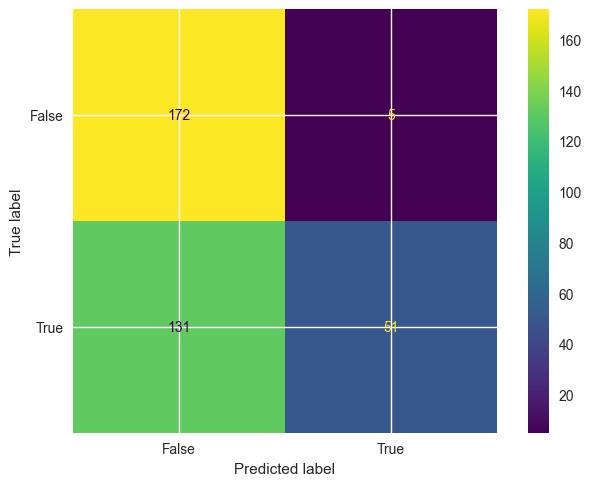

In [149]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

/var/folders/51/h4ghhg616dd3q7bsvdzhjr_h0000gn/T/ipykernel_5360/3373231529.py:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



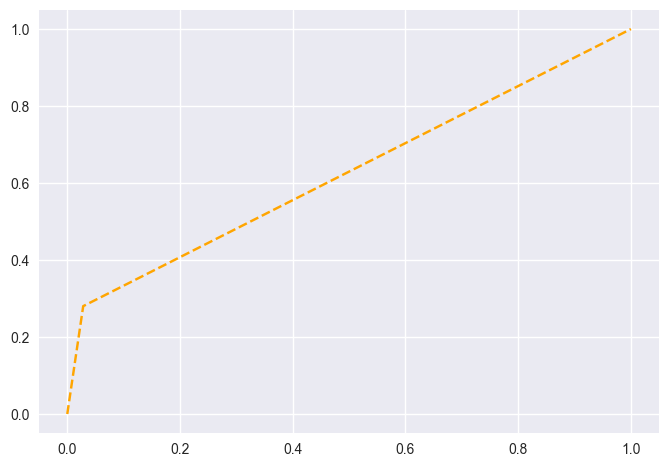

In [150]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresh = roc_curve(y_test, predictions, pos_label=1)
auc_score = roc_auc_score(y_test, predictions)
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

In [151]:
ytest = test_df['Sentiment']
print(len(tfidf_arr_train))
print(y_train.size)
# y_train.size
# ytrain = train_df['Sentiment']
# ytrain.size

11218
11218


In [152]:
#training
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import *

cat_classifier = CatBoostClassifier(iterations=3000,
                         learning_rate=0.001,
                         depth=8,
                         eval_metric='CrossEntropy',
                         od_type='Iter',
                         od_wait=30,
                         silent=True
                    )

cat_classifier.fit(tfidf_arr_train, y_train)

In [153]:
predictions = cat_classifier.predict(tfidf_array_test)
print('Test accuracy: %.2f\n' % (accuracy_score(y_test, predictions)))

Test accuracy: 0.64



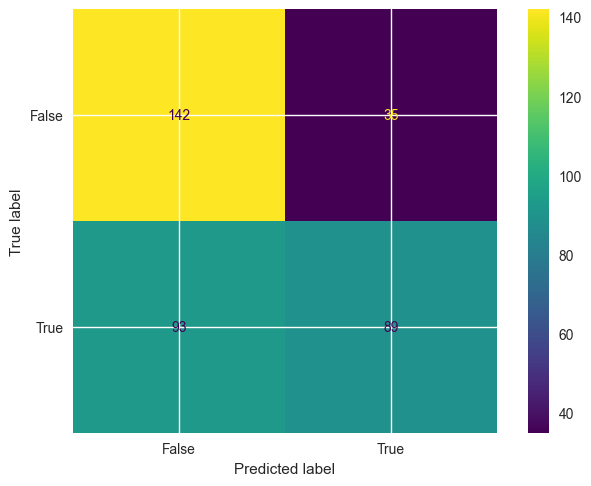

In [154]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

/var/folders/51/h4ghhg616dd3q7bsvdzhjr_h0000gn/T/ipykernel_5360/1968579964.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



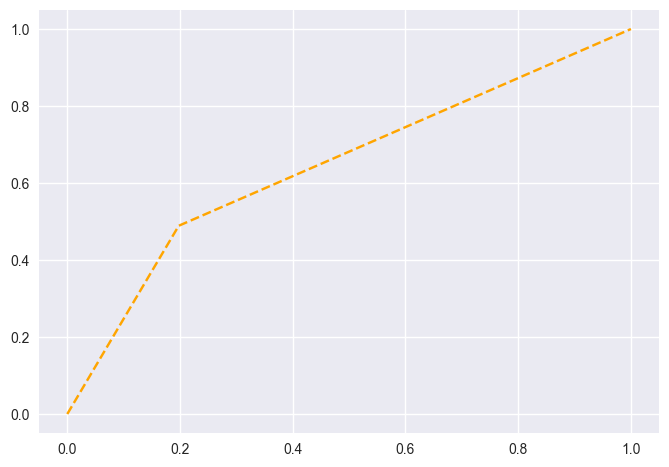

In [155]:
fpr, tpr, thresh = roc_curve(y_test, predictions, pos_label=1)
auc_score = roc_auc_score(y_test, predictions)
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='CatBoost Classifier')

In [157]:
ytest = test_df['Sentiment']
mnb = MultinomialNB()
mnb.fit(tfidf_arr_train, y_train)

predictions = mnb.predict(tfidf_array_test)
accuracy = metrics.accuracy_score(predictions, ytest)
print('Test score: %.2f\n' % (accuracy))

Test score: 0.74



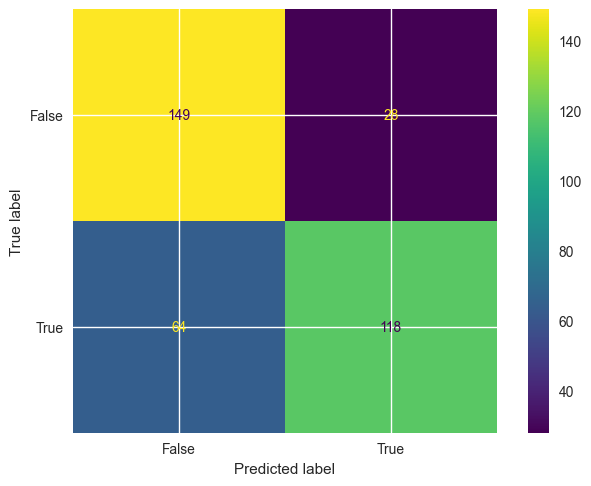

In [158]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

/var/folders/51/h4ghhg616dd3q7bsvdzhjr_h0000gn/T/ipykernel_5360/1589355472.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



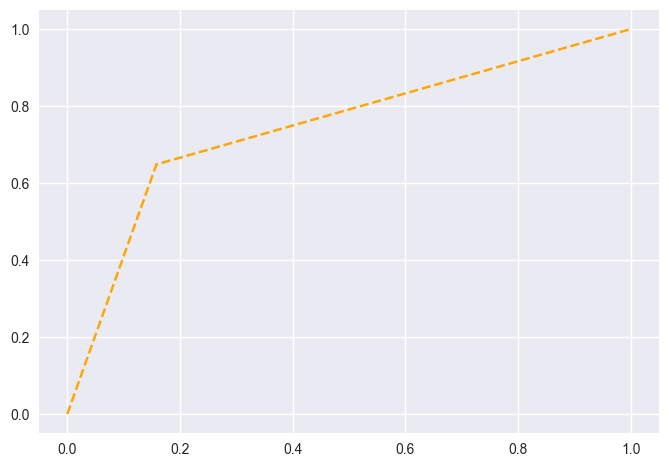

In [159]:
fpr, tpr, thresh = roc_curve(y_test, predictions, pos_label=1)
auc_score = roc_auc_score(y_test, predictions)
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Multinomial Naive Bayes')

In [160]:
# os_data_X.head(5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,tfidf_arr_train,y_train,cv=5)

In [161]:
print(scores)
scores.mean()

parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(tfidf_arr_train,y_train)
print(cv)

[0.78 0.85 0.97 0.97 0.96]
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, 20, None],
                         'n_estimators': [5, 50, 100]})


In [162]:
print("Test accuracy: ", scores.mean())

Test accuracy:  0.9064111122501934


In [163]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}



In [164]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
scores = cross_val_score(rf,tfidf_arr_train,y_train,cv=5)
rf.fit(tfidf_arr_train, y_train)
predictions = rf.predict(tfidf_array_test)
print(scores)
scores.mean()


[0.78 0.85 0.97 0.97 0.96]


0.9054304816807767

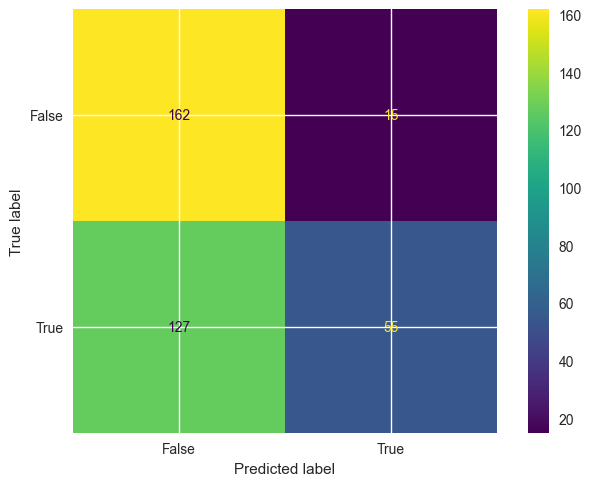

In [165]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

/var/folders/51/h4ghhg616dd3q7bsvdzhjr_h0000gn/T/ipykernel_5360/2051065574.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



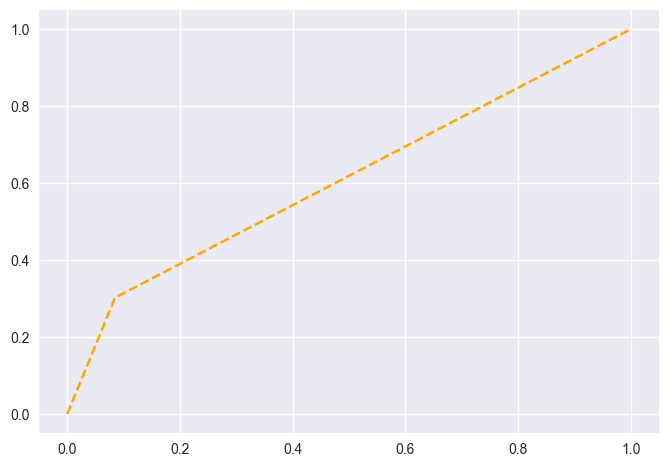

In [166]:
fpr, tpr, thresh = roc_curve(y_test, predictions, pos_label=1)
auc_score = roc_auc_score(y_test, predictions)
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')